In [2]:
#Download the cleaned data

!gdown 15d_dOUHjkSQb7BEicSDIDDh86kWLeMCP

Downloading...
From: https://drive.google.com/uc?id=15d_dOUHjkSQb7BEicSDIDDh86kWLeMCP
To: /content/loan_cleaned_file.csv
100% 16.3M/16.3M [00:00<00:00, 77.8MB/s]


In [3]:
# libraries to analyze data
import numpy as np
import pandas as pd

# libraries to visualize data
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(20, 6)})
# libraries to perform stats
import scipy.stats as stats

import warnings
# Suppress all FutureWarning messages
warnings.simplefilter(action='ignore', category=FutureWarning)
# Ignore only UserWarnings
warnings.filterwarnings("ignore", category=UserWarning)

In [4]:
# Read the data from a csv file
loan_clnd_df = pd.read_csv("/content/loan_cleaned_file.csv")

In [4]:
loan_clnd_df.shape

(148668, 19)

In [5]:
loan_clnd_df.head()

,Unnamed: 0,loan_limit,Gender,loan_type,loan_purpose,business_or_commercial,loan_amount,rate_of_interest,Upfront_charges,property_value,occupancy_type,income,credit_type,Credit_Score,co-applicant_credit_type,age,LTV,Region,Status
0,0,cf,Sex Not Available,type1,p1,nob/c,116500,4.2500,0.00,118000.0,pr,1740.0,EXP,758,CIB,25-34,98.728814,south,1
1,1,cf,Male,type2,p1,b/c,206500,3.9325,873.08,208000.0,pr,4980.0,EQUI,552,EXP,55-64,99.278846,North,1
2,2,cf,Male,type1,p1,nob/c,406500,4.5600,595.00,508000.0,pr,9480.0,EXP,834,CIB,35-44,80.019685,south,0
3,3,cf,Male,type1,p4,nob/c,456500,4.2500,1495.00,658000.0,pr,11880.0,EXP,587,CIB,45-54,69.376900,North,0
4,4,cf,Joint,type1,p1,nob/c,696500,4.0000,0.00,758000.0,pr,10440.0,CRIF,602,EXP,25-34,91.886544,North,0


In [6]:
#Unnamed: 0 is a field which is just an index and drop the column

loan_clnd_df = loan_clnd_df.drop('Unnamed: 0', axis=1)

## **What it is the probability of obtaining a Life Time Value (LTV) ratio greater than 100% for loans that are default?**

In [7]:
print(loan_clnd_df.LTV.max())

7831.25


In [8]:
loan_clnd_df[['property_value','loan_amount','LTV']][(loan_clnd_df.LTV>300)] #300 is random selection criteria

,property_value,loan_amount,LTV
16951,8000.0,626500,7831.25
46286,8000.0,236500,2956.25
47806,8000.0,416500,5206.25
55285,8000.0,536500,6706.25
65237,8000.0,376500,4706.25
123342,8000.0,186500,2331.25


**Observation:**

The value 8000 is systematically repeated when the LTV value is odd, suggesting that the missing values in the "property_value" column have been inputted intentionally. In other words, 8000 represents an initially missing value.

**Given that the affected rows represent a minimal portion of the dataset, it may be more prudent to simply drop them from further analysis**

In [9]:
odd_df=loan_clnd_df[['property_value','loan_amount','LTV']][(loan_clnd_df.LTV>300)]

In [10]:
odd_indexes=odd_df.index
odd_indexes

Index([16951, 46286, 47806, 55285, 65237, 123342], dtype='int64')

In [11]:
#Deleting the rows
print(loan_clnd_df.shape)
odd_indexes=list(odd_df.index)
loan_clnd_df.drop(index=odd_indexes,inplace=True)
print(loan_clnd_df.shape)

(148668, 18)
(148662, 18)


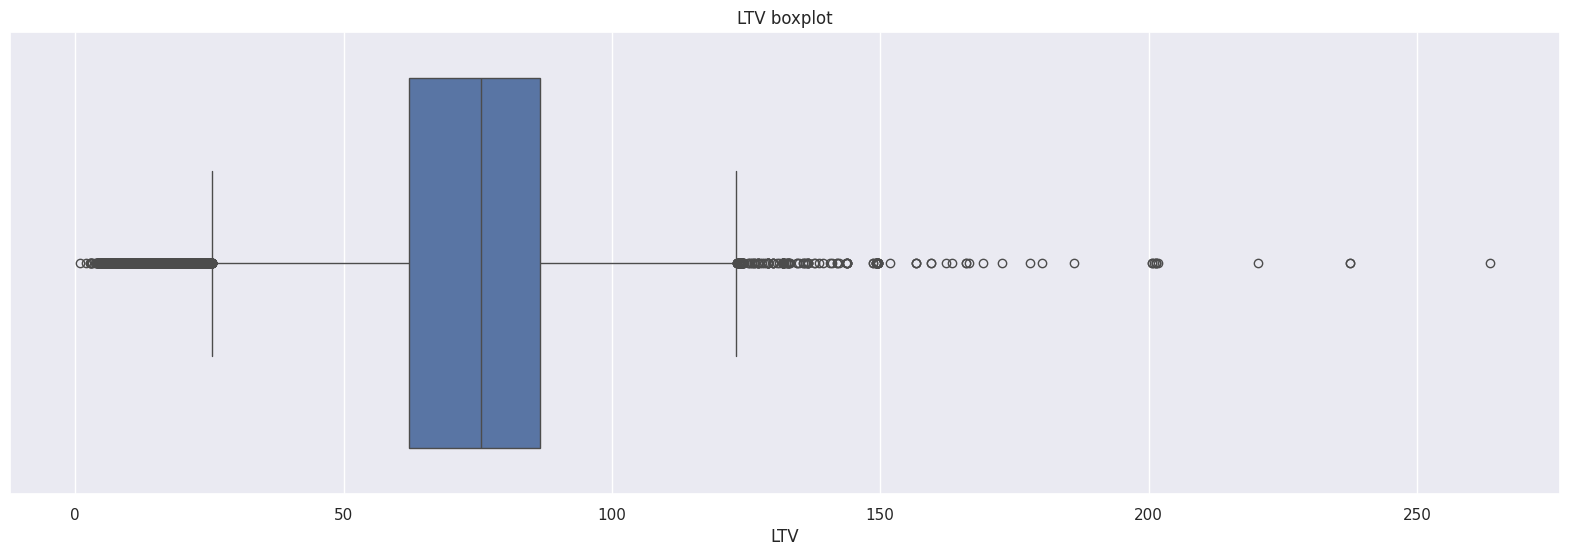

In [12]:
sns.boxplot(x="LTV", data=loan_clnd_df)
plt.title("LTV boxplot")
plt.show()

In [13]:
#Computing the probability of getting an LTV ratio more than 100% and the loan is default
loan_mean = round(loan_clnd_df['LTV'][loan_clnd_df.Status==0].mean(), 3)
loan_sd = round(loan_clnd_df['LTV'][loan_clnd_df.Status==0].std(), 3)

prob0 = stats.norm.cdf((100 - loan_mean)/loan_sd) #probability of LTV > 100 and being a normal loan
prob=1-prob0 #probability of LTV > 100 and being a default loan
print(prob.round(4))

0.0638


**Conclusion:** Given that the probability of getting an LTV ratio more than 100% is low (for Default loan cases), even if it represents a high-risk authorization, it would be advisable for the loan lender to keep offering this kind of service

## **Probability of a loan being defaulter**

In [15]:
loan_clnd_df.shape[0]

148662

In [16]:
loan_clnd_df[loan_clnd_df['Status'] == 1].shape[0]

36636

In [17]:
round((loan_clnd_df[loan_clnd_df['Status'] == 1].shape[0] / loan_clnd_df.shape[0] ) * 100 ,2)

24.64

## **Probability of a Gender impact given loan is default**

In [18]:
round((loan_clnd_df[loan_clnd_df['Status'] == 1]['Gender'].value_counts(normalize=True) * 100).round(2))

,proportion
Gender,
Male,30.0
Sex Not Available,29.0
Joint,22.0
Female,19.0


In [26]:
round((loan_clnd_df[loan_clnd_df['Status'] == 0]['Gender'].value_counts(normalize=True) * 100).round(2))

,proportion
Gender,
Joint,30.0
Male,28.0
Sex Not Available,24.0
Female,18.0


## **Probability of a Credit type impact given loan is default**

In [19]:
round((loan_clnd_df[loan_clnd_df['Status'] == 1]['credit_type'].value_counts(normalize=True) * 100).round(2))

,proportion
credit_type,
EQUI,42.0
CIB,21.0
CRIF,19.0
EXP,18.0


In [20]:
round((loan_clnd_df[loan_clnd_df['Status'] == 1]['age'].value_counts(normalize=True) * 100).round(2))

,proportion
age,
45-54,23.0
55-64,23.0
35-44,20.0
65-74,15.0
25-34,12.0
>74,6.0
<25,1.0


In [25]:
round((loan_clnd_df[loan_clnd_df['Status'] == 0]['age'].value_counts(normalize=True) * 100).round(2))

,proportion
age,
45-54,24.0
35-44,23.0
55-64,22.0
65-74,14.0
25-34,13.0
>74,4.0
<25,1.0


In [5]:
round((loan_clnd_df['age'].value_counts(normalize=True) * 100).round(2))

,proportion
age,
45-54,23.0
35-44,22.0
55-64,22.0
65-74,14.0
25-34,13.0
>74,5.0
<25,1.0


In [41]:
age_distro = loan_clnd_df[(loan_clnd_df['age'] == '>74') | (loan_clnd_df['age'] == '<25')]

In [42]:
age_distro.shape

(8512, 18)

In [45]:
min(age_distro['property_value']), max(age_distro['property_value'])

(38000.0, 6508000.0)

In [46]:
min(age_distro['income']), max(age_distro['income'])

(0.0, 198060.0)

In [48]:
age_distro[['income', 'property_value', 'LTV']].describe()

,income,property_value,LTV
count,8512.000000,8.512000e+03,8512.000000
mean,4816.191259,4.509417e+05,68.171357
std,5004.911728,4.293381e+05,22.552898
min,0.000000,3.800000e+04,2.856421
25%,2520.000000,2.180000e+05,53.113594
50%,3780.000000,3.280000e+05,71.197885
75%,5700.000000,5.480000e+05,85.256410
max,198060.000000,6.508000e+06,201.315789


In [47]:
min(age_distro['LTV']), max(age_distro['LTV'])

(2.856420627, 201.3157895)

In [21]:
round((loan_clnd_df[loan_clnd_df['Status'] == 1]['loan_limit'].value_counts(normalize=True) * 100).round(2))

,proportion
loan_limit,
cf,91.0
ncf,9.0


In [23]:
round((loan_clnd_df[loan_clnd_df['Status'] == 0]['loan_limit'].value_counts(normalize=True) * 100).round(2))

,proportion
loan_limit,
cf,94.0
ncf,6.0


In [27]:
round((loan_clnd_df[loan_clnd_df['Status'] == 1]['loan_purpose'].value_counts(normalize=True) * 100).round(2))

,proportion
loan_purpose,
p3,38.0
p4,34.0
p1,24.0
p2,3.0


In [28]:
round((loan_clnd_df[loan_clnd_df['Status'] == 0]['loan_purpose'].value_counts(normalize=True) * 100).round(2))

,proportion
loan_purpose,
p4,38.0
p3,37.0
p1,23.0
p2,2.0


In [35]:
round((loan_clnd_df['loan_purpose'].value_counts(normalize=True) * 100).round(2))

,proportion
loan_purpose,
p3,38.0
p4,37.0
p1,23.0
p2,2.0


In [37]:
round((loan_clnd_df[loan_clnd_df['loan_purpose'] == 'p2']['Status'].value_counts(normalize=True) * 100).round(2))

,proportion
Status,
0,67.0
1,33.0


In [22]:
round((loan_clnd_df[loan_clnd_df['Status'] == 1]['loan_type'].value_counts(normalize=True) * 100).round(2))

,proportion
loan_type,
type1,70.0
type2,20.0
type3,10.0


In [24]:
round((loan_clnd_df[loan_clnd_df['Status'] == 0]['loan_type'].value_counts(normalize=True) * 100).round(2))

,proportion
loan_type,
type1,78.0
type2,12.0
type3,10.0


In [34]:
round((loan_clnd_df['loan_type'].value_counts(normalize=True) * 100).round(2))

,proportion
loan_type,
type1,76.0
type2,14.0
type3,10.0


In [29]:
round((loan_clnd_df[loan_clnd_df['Status'] == 1]['Region'].value_counts(normalize=True) * 100).round(2))

,proportion
Region,
south,47.0
North,46.0
central,7.0
North-East,1.0


In [32]:
round((loan_clnd_df[loan_clnd_df['Status'] == 0]['Region'].value_counts(normalize=True) * 100).round(2))

,proportion
Region,
North,52.0
south,42.0
central,6.0
North-East,1.0


In [33]:
round((loan_clnd_df['Region'].value_counts(normalize=True) * 100).round(2))

,proportion
Region,
North,50.0
south,43.0
central,6.0
North-East,1.0
